**Titanic Tutorial Translation Assignment**

**Valeriia Zalizniak**

In this notebook there is the translation of the "Predictive modelling Titanic" R tutorial suggested in the class. The focus is on descriptive analysis, as well as the techniques of decision tree, random forest and logistic regression. It is also attempted to enhance it with some visualizations. 

**Importing the necessary packages:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import seaborn as sns
%matplotlib inline
from matplotlib import style
plt.style.use('bmh')
plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
import random
random.seed(123)

**Importing and exploring the data:**

In [2]:
df = pd.read_csv(r"C:\Users\KRB10\Downloads/Titanic_data.csv", sep = ',')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv(r"C:\Users\KRB10\Downloads/test.csv", sep = ',')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
len(df)

891

In [7]:
len(test_df)

418

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Looking for missing values:**

In [9]:
# Seeing that 2 passengers did not embark
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
summary = df.describe()

In [11]:
summary = summary.transpose()

In [12]:
summary.head()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.500,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0


In [13]:
summary

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Dropping unnecessary rows with missing values:**

In [106]:
#Dropping Passengers who did not Embark, and dropping Age
df2=df.dropna(subset = ['Embarked','Age'])

In [17]:
# Null values have been dropped and new df created
len(df2)

712

In [18]:
# Creating Arrays of the 3 columns Pclass Survived and Embarked

p_array = np.array(['Pclass'])
s_array = np.array(['Survived'])
E_array = np.array(['Embarked'])
from sklearn.model_selection import train_test_split


In [19]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**Descriptive Statistics:**

In [21]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

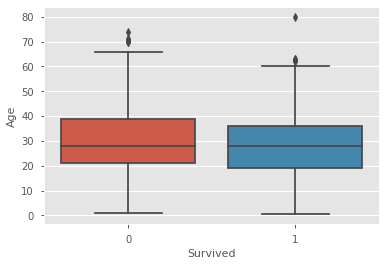

In [22]:
figsize = [20,30]
sns.boxplot(x = df['Survived'], y= df['Age']);

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

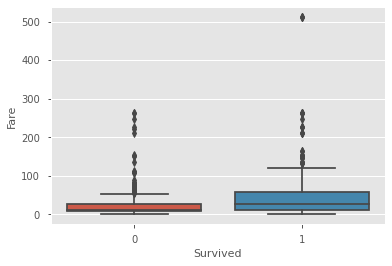

In [24]:
figsize = [15,30]
sns.boxplot(x = df['Survived'], y= df['Fare']);

In [25]:
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [26]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

**Table Creations:**

In [27]:
# Table of survival vs. sex
survived_sex = pd.crosstab(index=df["Survived"], 
                           columns=df["Sex"])

survived_sex.index= ["died","survived"]

survived_sex

Sex,female,male
died,81,468
survived,233,109


In [28]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]

survived_class

,class1,class2,class3
died,80,97,372
survived,136,87,119


In [29]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [30]:
#Dropping names from the dataset
df2.drop(labels ='Name', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [31]:
genders = {"male": 0, "female": 1}
data = [df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Data Visualization:**

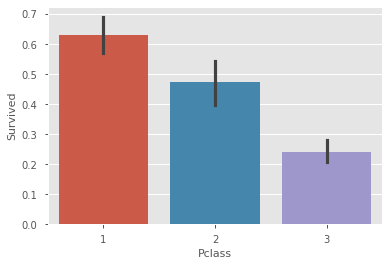

In [32]:
sns.barplot(x='Pclass', y='Survived', data=df);

In [39]:
df['Gender'] = Sex_binary
numeric = df2[df2.columns.difference(['PassengerId','Cabin','Ticket','Name','Sex','Embarked'])]
pd.get_dummies(df2["Embarked"])
numeric = pd.concat([numeric, pd.get_dummies(df2['Embarked'])], axis=1)

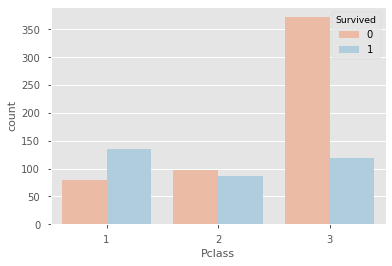

In [40]:
sns.countplot(df['Pclass'], hue=df['Survived'],palette="RdBu");

C:\Users\KRB10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\KRB10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\KRB10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\KRB10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


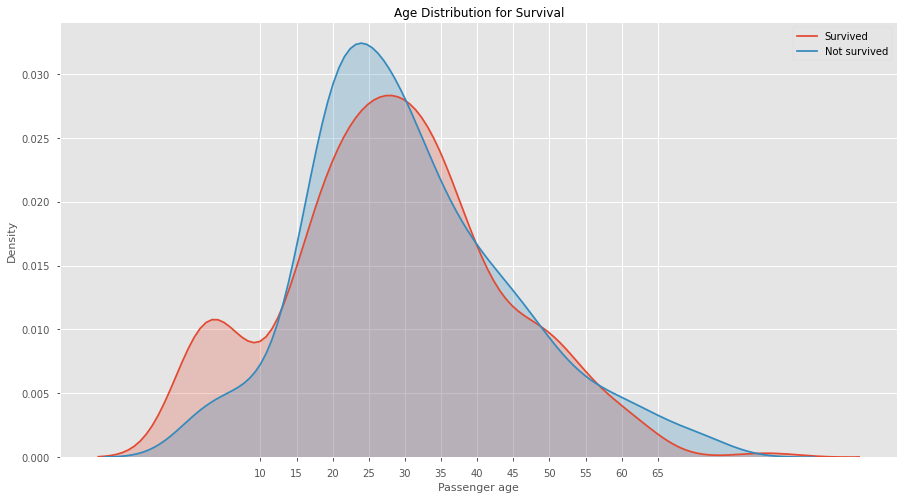

In [41]:
f,ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[df.Survived == 1, "Age"], shade = True, label = "Survived")
sns.kdeplot(df.loc[df.Survived == 0, "Age"], shade = True, label = "Not survived")
ax.set(xlabel = "Passenger age", ylabel = "Density",title = "Age Distribution for Survival")
ax.set_xticks(range(10, 70, 5))
plt.show();

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Sex_binary = labelencoder.fit_transform(df.Sex)
print(Sex_binary)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 

C:\Users\KRB10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KRB10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\KRB10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\KRB10\Anaconda3\lib\site-packages\pandas\plotting\_matpl

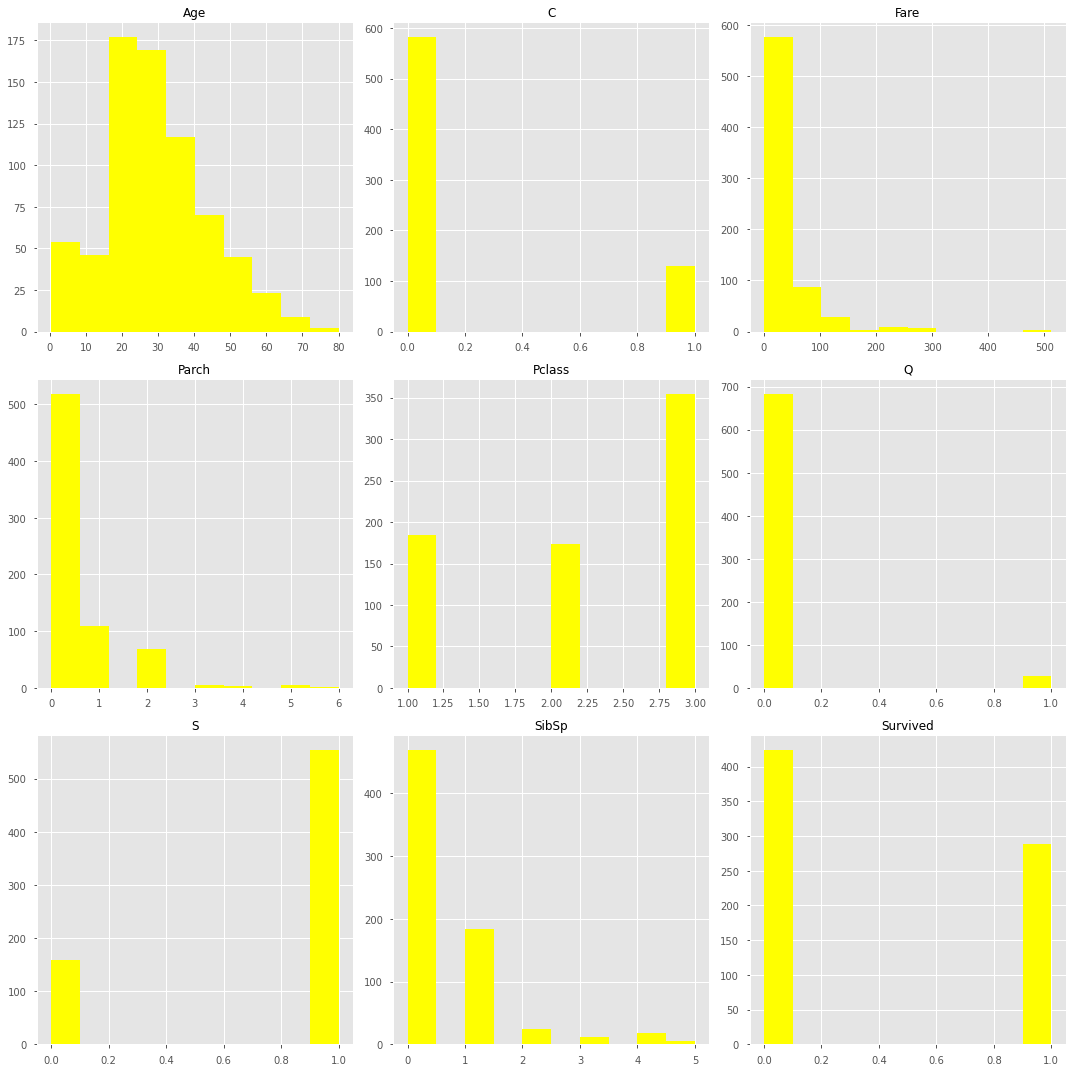

In [43]:
pd.DataFrame.hist(numeric, figsize = (15,15),color="yellow")
plt.tight_layout()
plt.show();

**Correlation heatmap:**

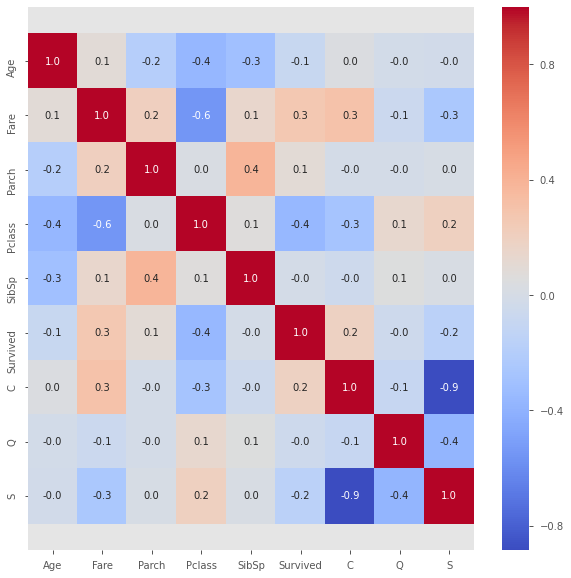

<Figure size 720x720 with 0 Axes>

In [44]:
f,ax = plt.subplots(figsize=(10, 10))
correlations = numeric.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, fmt= '.1f',annot=True,ax=ax, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

**Peak of non-surviving customers with particular fare:**

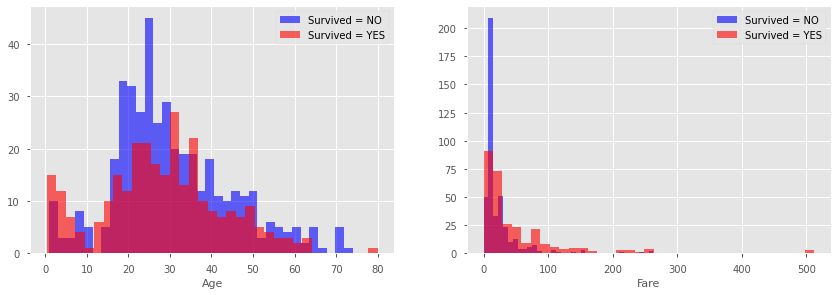

In [45]:
cont_col = []
for column in numeric.columns:
    if numeric[column].dtypes != object and numeric[column].nunique() > 10:
        ("")
        cont_col.append(column)
        (" ");
plt.figure(figsize=(30, 10))
for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    numeric[numeric["Survived"] == 0][column].hist(bins=35, color='blue', label='Survived = NO', alpha=0.6)
    numeric[numeric["Survived"] == 1][column].hist(bins=35, color='red', label='Survived = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Train - test split:**

In [46]:
y = numeric['Survived']
X = numeric.drop(['Survived'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 569 samples in the training dataset
There are 143 samples in the testing dataset
Each sample has 8 features


**Decision tree:**

In [47]:
from sklearn import tree
estimator = tree.DecisionTreeClassifier(criterion="entropy")
estimator.fit(X_train, y_train);

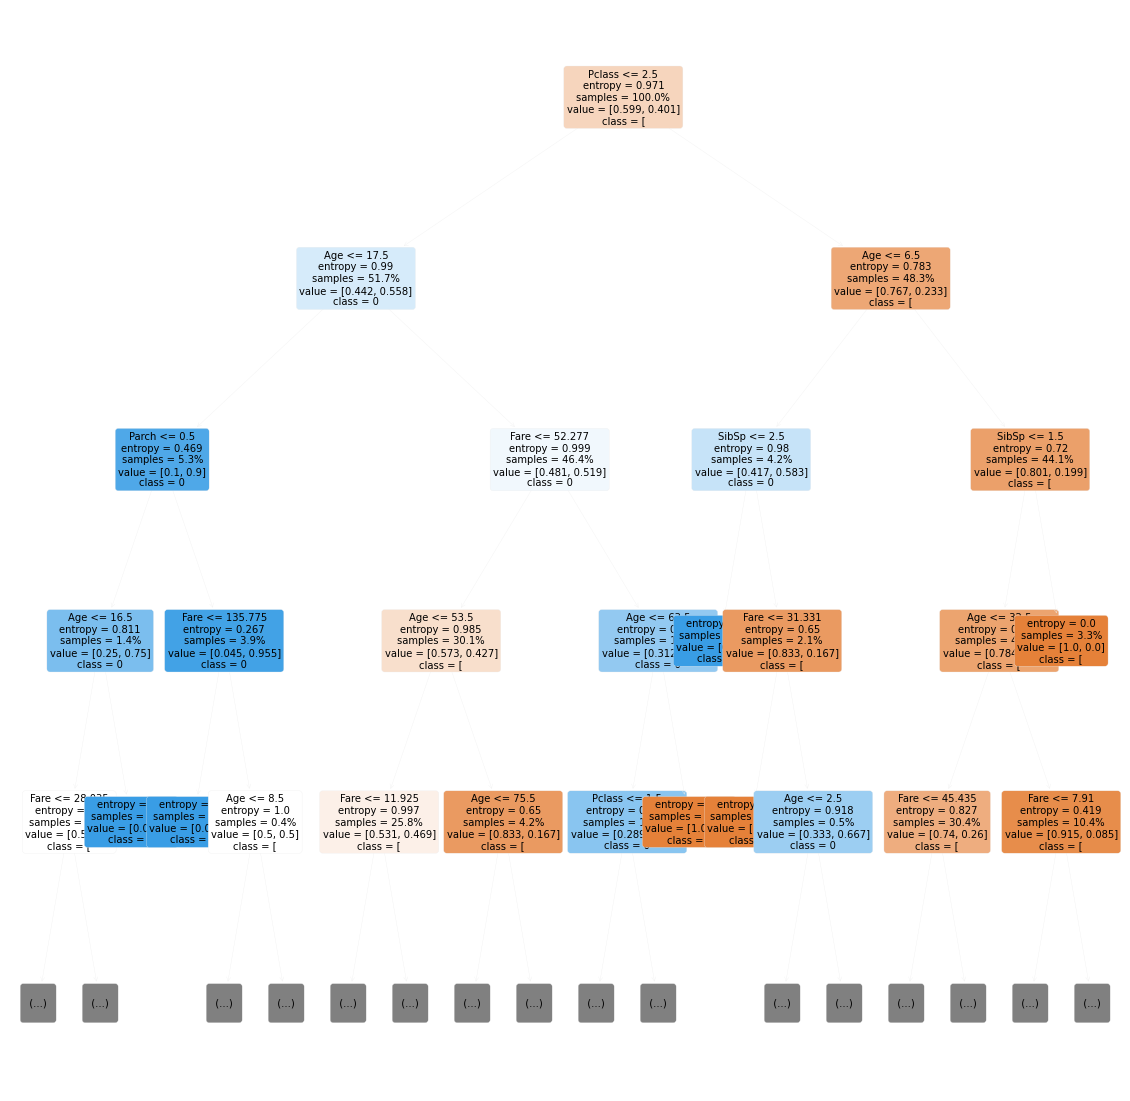

In [48]:
plt.figure(figsize = (20,20),
          )
tree.plot_tree(estimator
          , filled=True
          , feature_names = X.columns
          , class_names = str(estimator.classes_)
          , rounded = True
          , proportion = True
          , fontsize = 10
          , max_depth = 4);

In [49]:
y_predicted_test = estimator.predict(X_test)
accuracy_ho = accuracy_score(y_test, y_predicted_test) * 100
fitted_max_depth = estimator.tree_.max_depth
print("The accuracy on test set is {0:.1f}%".format(accuracy_ho))
print("The maximum depth of the fitted tree is {}".format(fitted_max_depth))
parameter_values = range(1,fitted_max_depth+1)

The accuracy on test set is 64.3%
The maximum depth of the fitted tree is 22


**ROC curve for the decision tree:**

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [133]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = estimator.predict_proba(X_train)
y_scores = y_scores[:,1]

In [138]:
from sklearn.metrics import roc_curve

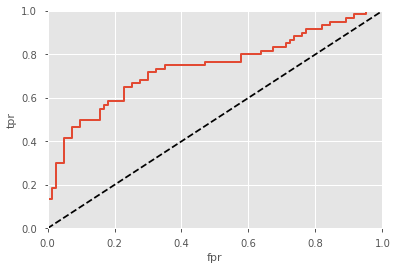

In [139]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("fpr")
    plt.ylabel("tpr")
plot_roc_curve(fpr, tpr)
plt.show()

In [125]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9991382414981737


**Random forest:**

Top 10 Features: ['Fare', 'Pclass', 'Age', 'SibSp', 'Parch', 'C', 'S', 'Q']
Accuracy on Training set: 0.7258347978910369
Accuracy on Test set: 0.7552447552447552
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        83
           1       0.86      0.50      0.63        60

    accuracy                           0.76       143
   macro avg       0.79      0.72      0.72       143
weighted avg       0.78      0.76      0.74       143



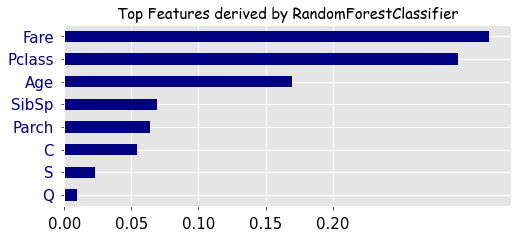

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
n = 10    
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X_train, y_train)
pd.Series(rfc_model.feature_importances_, index=X_train.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()   
ticks_x = np.linspace(0, 0.2, 5)   
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X_train.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

print('Accuracy on Training set: {}'.format(rfc_model.score(X_train,y_train)))
print('Accuracy on Test set: {}'.format(accuracy_score(y_test, rfc_model.predict(X_test) )))
print("="*80)
print(classification_report(y_test, rfc_model.predict(X_test)))

**Logistic regression:**

In [54]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)  
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
yhat = LR.predict(X_test)
print("Accuracy with selected features: " + str(accuracy_score(y_test, yhat) * 100) + "%")

Accuracy with selected features: 68.53146853146853%


In [104]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rfc_model, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[286,  55],
       [114, 114]], dtype=int64)

In [105]:
cm = confusion_matrix(y_test, yhat)
print("\nConfusion matrix - test set:\n")
print(cm)


Confusion matrix - test set:

[[81  2]
 [43 17]]


In [57]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78        83
           1       0.89      0.28      0.43        60

    accuracy                           0.69       143
   macro avg       0.77      0.63      0.61       143
weighted avg       0.75      0.69      0.63       143



In [58]:
print(yhat)

[0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [59]:
print(y_train)

569    1
572    1
685    0
40     0
399    1
      ..
125    1
401    0
480    0
456    0
646    0
Name: Survived, Length: 569, dtype: int64


**ROC AUC curve for logistic regression:**

In [60]:
y_preds = LR.predict_proba(X_test)

In [61]:
preds = y_preds[:,1]

In [62]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

In [63]:
auc_score = metrics.auc(fpr, tpr)
auc_score

0.7407630522088354

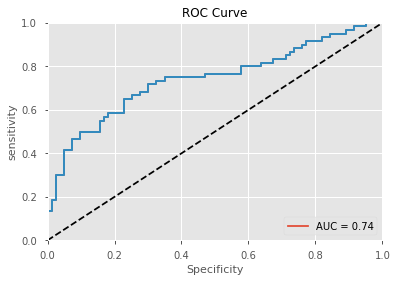

In [64]:
plt.clf()
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Specificity')
    plt.ylabel("sensitivity")
plot_roc_curve(fpr, tpr)
plt.legend(loc='lower right')
plt.show()